In [1]:
# Gerekli kütüphaneleri içe aktaralım
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
%matplotlib inline


In [67]:
df = pd.read_csv("14-income_evaluation.csv")
df.head()
# 50K <=50K income target

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.shape

(32561, 15)

In [4]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [5]:
df_names = ['age', 'workclass', 'finalweight', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income']

In [6]:
df.columns = df_names

In [7]:
df.columns

Index(['age', 'workclass', 'finalweight', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [8]:
df.info()
# datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   finalweight     32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
df.describe()

,age,finalweight,education_num,capital-gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
df.isnull().sum()

age               0
workclass         0
finalweight       0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [11]:
df["income"].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [68]:
categorical = [col for col in df.columns if df[col].dtype == "O"]
numerical = [col for col in df.columns if df[col].dtype != "O"]
print(categorical) # object olan kolonlar
print(numerical) # numerical olan kolonlar

[' workclass', ' education', ' marital-status', ' occupation', ' relationship', ' race', ' sex', ' native-country', ' income']
['age', ' fnlwgt', ' education-num', ' capital-gain', ' capital-loss', ' hours-per-week']


In [13]:
df[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [14]:
for col in categorical:
    print(df[col].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
marital_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      

Text(0.5, 1.0, 'Cinsiyete göre gelir dağılımı')

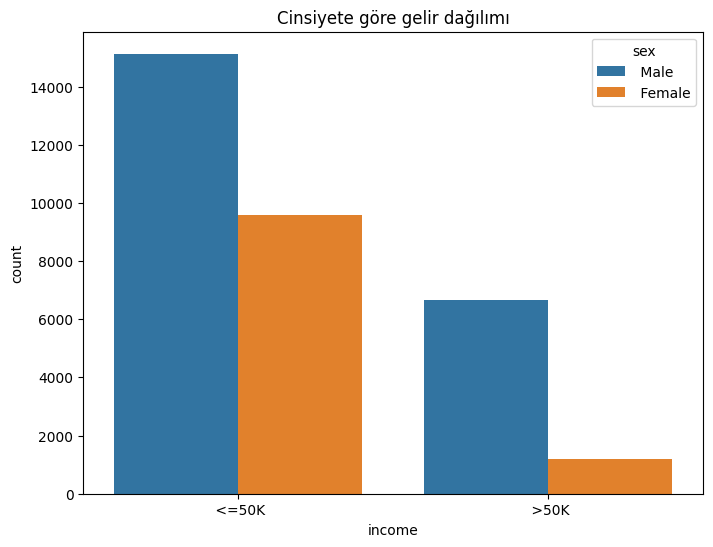

In [15]:
fig, ax = plt.subplots(figsize = (8,6))

ax = sns.countplot(x="income" , hue="sex", data=df)

ax.set_title("Cinsiyete göre gelir dağılımı")

Text(0.5, 1.0, 'race göre gelir dağılımı')

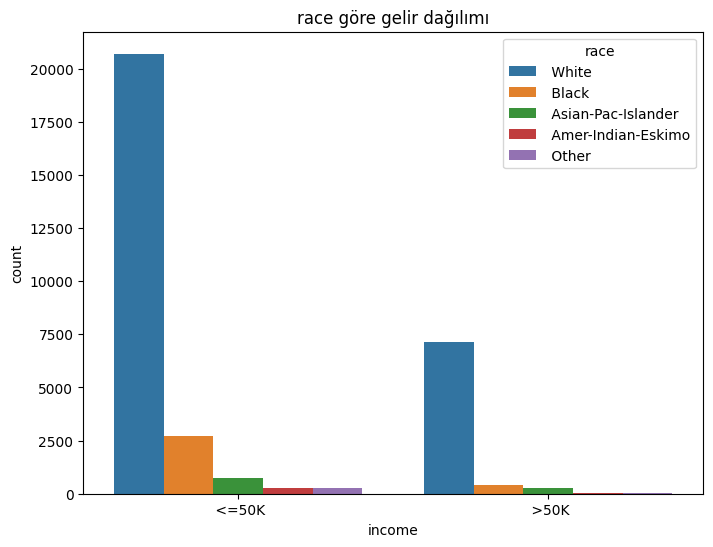

In [16]:
fig, ax = plt.subplots(figsize = (8,6))

ax = sns.countplot(x="income" , hue="race", data=df)

ax.set_title("race göre gelir dağılımı")

In [17]:
over_40_hours = df[df["hours_per_week"] > 40]
under_40_hours = df[df["hours_per_week"] <= 40]

In [18]:
over_40_hours["income"].value_counts()

income
<=50K    5725
>50K     3856
Name: count, dtype: int64

In [19]:
under_40_hours["income"].value_counts()

income
<=50K    18995
>50K      3985
Name: count, dtype: int64

In [20]:
df["workclass"].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [21]:
df["workclass"] = df["workclass"].replace(" ?", np.nan)

In [22]:
df["occupation"].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [23]:
df["occupation"] = df["occupation"].replace(" ?", np.nan)

In [24]:
df["native_country"].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [25]:
df["native_country"] = df["native_country"].replace(" ?", np.nan)

In [26]:
df.isnull().sum()

age                  0
workclass         1836
finalweight          0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [27]:
#sns.pairplot(df, hue="income")

In [28]:
X = df.drop("income", axis=1)
y = df["income"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=15, test_size=0.3)

In [30]:
categorical = [col for col in X_train.columns if X_train[col].dtype == "O"]


In [31]:
X_train[categorical].isnull().sum()

workclass         1262
education            0
marital_status       0
occupation        1265
relationship         0
race                 0
sex                  0
native_country     392
dtype: int64

In [32]:
X_train["workclass"].mode()[0]

' Private'

In [33]:
for i in [X_train, X_test]:
    i["workclass"] = i["workclass"].fillna(X_train["workclass"].mode()[0])
    i["occupation"] = i["occupation"].fillna(X_train["occupation"].mode()[0])
    i["native_country"] = i["native_country"].fillna(X_train["native_country"].mode()[0])

In [34]:
X_train[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [35]:
X_test[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [36]:
#encoding

In [37]:
X_train[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
32174,Self-emp-not-inc,Bachelors,Never-married,Sales,Not-in-family,White,Male,United-States
2680,Local-gov,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,El-Salvador
10874,Private,Some-college,Widowed,Exec-managerial,Unmarried,White,Female,United-States
25028,Private,9th,Married-civ-spouse,Craft-repair,Husband,Other,Male,Mexico
25881,Self-emp-inc,Bachelors,Married-civ-spouse,Adm-clerical,Husband,White,Male,United-States


In [38]:
y_train_binary = y_train.apply(lambda x:1 if x.strip() == ">50K" else 0)

In [39]:
target_means = y_train_binary.groupby(X_train["native_country"]).mean()

In [40]:
X_train["native_country_encoded"] = X_train["native_country"].map(target_means)
X_train["native_country_encoded"] = X_train["native_country_encoded"].fillna(y_train_binary.mean())

X_test["native_country_encoded"] = X_test["native_country"].map(target_means)
X_test["native_country_encoded"] = X_test["native_country_encoded"].fillna(y_train_binary.mean())

In [41]:
X_train = X_train.drop("native_country", axis=1)
X_test = X_test.drop("native_country", axis=1)

In [42]:
one_hot_categories = ['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',]

In [43]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [44]:
encoder = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), one_hot_categories
         
        )
    ], remainder="passthrough"

)

In [45]:
X_train_enc = encoder.fit_transform(X_train)
X_test_enc = encoder.transform(X_test)

In [46]:
columns = encoder.get_feature_names_out() # featuresların adlarını kaydedebiliriz

In [47]:
# df çevirdik 
X_train = pd.DataFrame(X_train_enc, columns=columns, index=X_train.index)
X_test = pd.DataFrame(X_test_enc, columns=columns, index=X_test.index)

In [48]:
X_train

,cat__workclass_ Federal-gov,cat__workclass_ Local-gov,cat__workclass_ Never-worked,cat__workclass_ Private,cat__workclass_ Self-emp-inc,cat__workclass_ Self-emp-not-inc,cat__workclass_ State-gov,cat__workclass_ Without-pay,cat__education_ 10th,cat__education_ 11th,...,cat__race_ White,cat__sex_ Female,cat__sex_ Male,remainder__age,remainder__finalweight,remainder__education_num,remainder__capital-gain,remainder__capital_loss,remainder__hours_per_week,remainder__native_country_encoded
32174,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,44.0,157217.0,13.0,0.0,0.0,42.0,0.247311
2680,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,26.0,336969.0,13.0,0.0,0.0,28.0,0.129032
10874,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,53.0,233369.0,10.0,0.0,0.0,40.0,0.247311
25028,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,30.0,348618.0,5.0,0.0,0.0,40.0,0.062907
25881,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,50.0,140516.0,13.0,0.0,0.0,40.0,0.247311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16247,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,36.0,376455.0,11.0,0.0,0.0,38.0,0.247311
2693,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,24.0,145964.0,13.0,0.0,0.0,40.0,0.247311
8076,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,50.0,136913.0,9.0,0.0,0.0,50.0,0.247311
20213,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,25.0,182227.0,9.0,0.0,1579.0,40.0,0.247311


In [49]:
X_test

,cat__workclass_ Federal-gov,cat__workclass_ Local-gov,cat__workclass_ Never-worked,cat__workclass_ Private,cat__workclass_ Self-emp-inc,cat__workclass_ Self-emp-not-inc,cat__workclass_ State-gov,cat__workclass_ Without-pay,cat__education_ 10th,cat__education_ 11th,...,cat__race_ White,cat__sex_ Female,cat__sex_ Male,remainder__age,remainder__finalweight,remainder__education_num,remainder__capital-gain,remainder__capital_loss,remainder__hours_per_week,remainder__native_country_encoded
10125,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,47.0,182752.0,9.0,0.0,0.0,35.0,0.423077
11478,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,73.0,161027.0,3.0,0.0,0.0,20.0,0.247311
4224,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,18.0,152182.0,10.0,0.0,0.0,25.0,0.247311
6592,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,66.0,284021.0,9.0,0.0,0.0,40.0,0.247311
21910,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,39.0,261504.0,8.0,0.0,0.0,40.0,0.247311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31624,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,29.0,261725.0,13.0,0.0,0.0,35.0,0.247311
1488,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,57.0,278763.0,9.0,0.0,0.0,40.0,0.247311
8725,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,48.0,334409.0,13.0,0.0,0.0,50.0,0.247311
11150,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,37.0,302604.0,10.0,0.0,0.0,40.0,0.247311


In [50]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [51]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
# training

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rfc = RandomForestClassifier(n_estimators=10, random_state=15)
rfc.fit(X_train, y_train)

,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [55]:
y_pred = rfc.predict(X_test)

In [56]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

0.8538233186610708
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91      7444
        >50K       0.74      0.60      0.66      2325

    accuracy                           0.85      9769
   macro avg       0.81      0.77      0.78      9769
weighted avg       0.85      0.85      0.85      9769

[[6950  494]
 [ 934 1391]]


In [57]:
rfc = RandomForestClassifier(n_estimators=100, random_state=15)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

0.8629337700890573
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      7444
        >50K       0.75      0.64      0.69      2325

    accuracy                           0.86      9769
   macro avg       0.82      0.79      0.80      9769
weighted avg       0.86      0.86      0.86      9769

[[6931  513]
 [ 826 1499]]


In [58]:
#hyperparameter

In [59]:
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
    'max_depth': [int(x) for x in np.linspace(10, 100, num=10)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

In [60]:
from sklearn.model_selection import RandomizedSearchCV

In [61]:
rfc = RandomForestClassifier(random_state=42)

In [62]:
random_search = RandomizedSearchCV(
    estimator=rfc,
    param_distributions=param_dist,
    n_iter=10,  # toplam denenmek istenen kombinasyon sayısı
    cv=5,        # 5 katlı çapraz doğrulama
    verbose=2,
    random_state=42,
    n_jobs=-1    # tüm çekirdekleri kullan
)

In [63]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\alkav\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\alkav\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\alkav\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\Use

,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'bootstrap': [True, False], 'criterion': ['gini', 'entropy'], 'max_depth': [10, 20, ...], 'max_features': ['auto', 'sqrt', ...], ...}"
,n_iter,10
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [65]:
y_pred = random_search.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

0.8696898351929573
              precision    recall  f1-score   support

       <=50K       0.89      0.94      0.92      7444
        >50K       0.77      0.64      0.70      2325

    accuracy                           0.87      9769
   macro avg       0.83      0.79      0.81      9769
weighted avg       0.86      0.87      0.87      9769

[[7006  438]
 [ 835 1490]]


In [66]:
random_search.best_params_

{'n_estimators': 900,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 100,
 'criterion': 'entropy',
 'bootstrap': True}

✅ 'n_estimators'

Açıklama: Ormanda kaç tane karar ağacı (decision tree) kullanılacağını belirtir.

Etki: Yüksek değer genellikle daha iyi sonuç verir ama işlem süresi uzar.

Senin değerin: 100 ile 1000 arasında 10 farklı değer deneniyor.

✅ 'max_depth'

Açıklama: Ağaçların maksimum derinliğidir.

Etki: Çok derin ağaçlar aşırı öğrenmeye (overfitting) neden olabilir. None olursa ağaçlar tamamen büyür.

Senin değerin: 10 ile 100 arasında 10 değer ve None.

✅ 'min_samples_split'

Açıklama: Bir düğümün bölünebilmesi için gereken minimum örnek sayısı.

Etki: Düşük değerler ağaçları daha kompleks hale getirir (overfit riski artar).

Senin değerin: 2, 5, 10.

✅ 'min_samples_leaf'

Açıklama: Bir yaprakta olması gereken minimum örnek sayısı.

Etki: Ağaçların daha dengeli ve genellenebilir olmasını sağlar.

Senin değerin: 1, 2, 4.

✅ 'max_features'

Açıklama: Her ağacın her bölünme noktasında kaç özellik kullanacağını belirtir.

Değerler:

'auto' (veya 'sqrt'): √n_features

'log2': log2(n_features)

✅ 'bootstrap'

Açıklama: Her ağacı oluştururken veri örnekleme yöntemi.

True: Örnekler tekrar seçilerek (bootstrap sampling)

False: Tüm verilerle eğitilir

✅ 'criterion'

Açıklama: Hangi kalite ölçüsüne göre bölme yapılacağını belirtir.

Seçenekler: 'gini' (varsayılan) ya da 'entropy' (bilgi kazancı)

| Özellik                  | `RandomizedSearchCV`                            | `GridSearchCV`                                 |
| ------------------------ | ----------------------------------------------- | ---------------------------------------------- |
| **Arama Şekli**          | Belirli sayıdaki rastgele kombinasyonu dener    | Tüm olasılıkları dener (tüm kombinasyonları)   |
| **Hız**                  | Daha hızlıdır (özellikle çok parametre varsa)   | Daha yavaştır                                  |
| **Hiperparametre Alanı** | Daha geniş alanda kaba ama hızlı tarama         | Daha dar ama detaylı ve tam tarama             |
| **Kullanım Durumu**      | Büyük hiperparametre arama alanlarında önerilir | Küçük ve önemli kombinasyonlarda tercih edilir |
| **n\_iter (kullanılır)** | ✅                                               | ❌ (tümünü dener)                               |
